In [12]:
# imports libraries needed to run the rest of this code

import warnings
from glob import glob
from os.path import basename, splitext

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats
import sklearn as sk
import sklearn.decomposition 

import seaborn as sns
from scipy.io import loadmat
from scipy.signal import savgol_filter
from scipy.signal import find_peaks
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import connected_components
from tqdm import tqdm
import pyarrow
#from heatmap import heatmap, corrplot


In [8]:
import sys
sys.path.append('C:\\Users\\Sheffield_lab\\PycharmProjects\\axon_tb')

In [213]:
from src.axon_preprocessing import *
from scipy.signal import peak_prominences

In [13]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
rng = np.random.default_rng()
import scipy

In [14]:
%load_ext autoreload
%autoreload 2

In [15]:
%pwd

'C:\\Users\\Sheffield_lab\\PycharmProjects\\axon_tb\\jupyter'

In [16]:
path = 'D:\\Axon\\Analysis\\L34\\day2\\suite2p\\combined'
raw = np.load(os.path.join(path, 'F.npy'))
raw.shape

(10000, 26000)

In [54]:
s = smoothing(raw[:, :5000], window_size=20)

In [34]:
roi = SelectROI()

1770 rois selected using power > 0.35


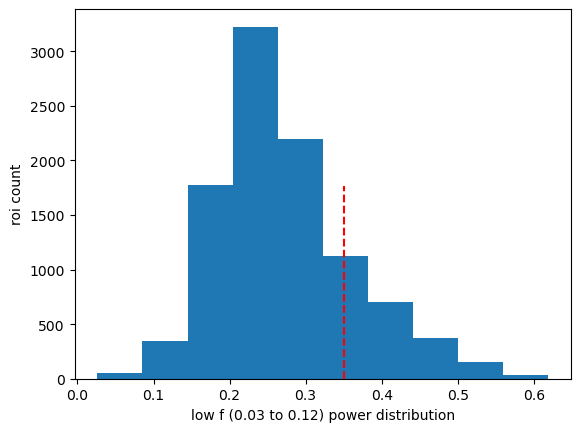

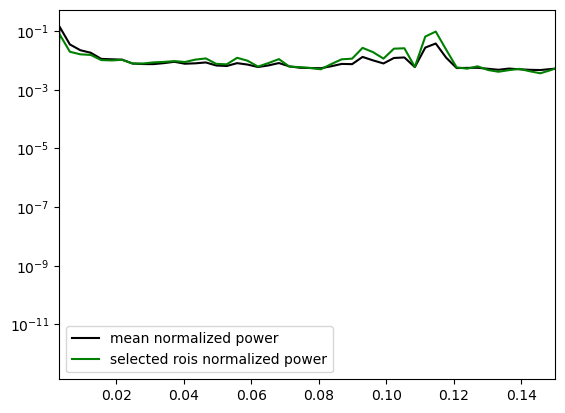

In [55]:
rois, power_neuron, f = roi.select_transient_bands(s[:, :5000], power_thresh=0.35)

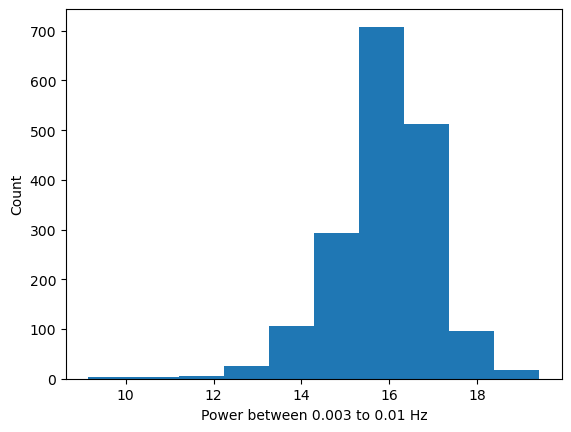

In [56]:
drift_rois = roi.find_drift_rois(s[:, :5000], rois)

In [111]:
df_f = convert_df_f(s[rois, :5000])

In [157]:
fc3 = f_to_fc3(df_f)


In [160]:
mat = find_transients(fc3)


In [167]:
final_rois_ind = np.where(np.sum(mat, axis=1)>0)[0]
final_rois = rois[final_rois_ind]

In [177]:
final_mat = mat[final_rois_ind, :]

In [178]:
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph._traversal import connected_components
# plot the max correlations distributions
corr_thresh = 0.8
cov_nov = np.corrcoef(final_mat)
np.fill_diagonal(cov_nov, np.nan)
max_corr = np.nanmax(cov_nov,axis=0)
print(np.nanmean(np.nanmax(cov_nov,axis=0)) + np.nanstd(np.nanmax(cov_nov,axis=0)))


0.9241298545271666


In [ ]:
# Spurious correlation: Chong solution
rng = np.random.default_rng(9)
shuffled_green = rng.permuted(fc3_filtered[:, 7500:15000], axis=1)
cov_matrix = np.corrcoef(shuffled_green)
cov_matrix_final = cov_matrix[~np.eye(cov_matrix.shape[0],dtype=bool)].reshape(cov_matrix.shape[0],-1)
nov_corr_mean = np.nanmax(cov_matrix_final)
nov_corr_std = np.nanstd(cov_matrix_final)
print(nov_corr_mean)
print(nov_corr_std)
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph._traversal import connected_components
# plot the max correlations distributions
corr_thresh = 0.7
cov_nov = np.corrcoef(fc3_filtered[:, 5500:12000])
np.fill_diagonal(cov_nov, np.nan)
max_corr = np.nanmax(cov_nov,axis=0)
print(np.nanmean(np.nanmax(cov_nov,axis=0)) + np.nanstd(np.nanmax(cov_nov,axis=0)))
# Chong's note: 7500 instead of 5000!!!
# Chong: corrected for the 0, so if no spike, correlation is 1!
fam_corr = np.corrcoef(fc3_filtered[max_corr>corr_thresh, 5500:12000])#+2.22e-16)
nov_corr = np.corrcoef(fc3_filtered[max_corr>corr_thresh, 13000:])#+2.22e-16)
# ground truth
n_comp, group_ids = connected_components(csr_matrix((fam_corr>nov_corr_mean+2*nov_corr_std) & (nov_corr>nov_corr_mean+2*nov_corr_std)), directed=False, return_labels=True
    )

(array([  5.,  37.,  85., 145., 191., 208., 224., 201., 246., 388.]),
 array([0.22438361, 0.30188792, 0.37939223, 0.45689654, 0.53440085,
        0.61190516, 0.68940947, 0.76691378, 0.84441809, 0.9219224 ,
        0.99942671]),
 <BarContainer object of 10 artists>)

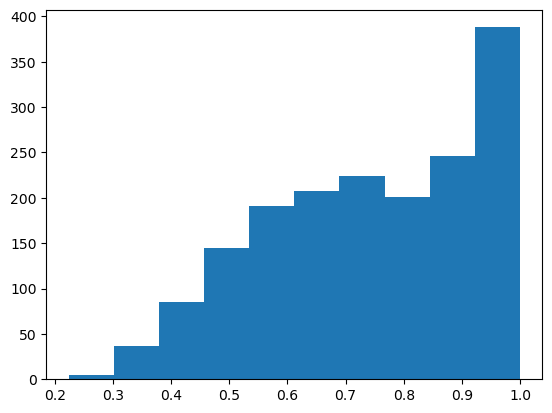

In [179]:
plt.hist(max_corr)

In [173]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_spd_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.metrics import adjusted_mutual_info_score, adjusted_rand_score
from sklearn.cluster import AgglomerativeClustering

# potential non-singleton ROIs: 760
cluster:  7
Silhouette Score:  0.3644857165521154
cluster:  8
Silhouette Score:  0.39541776890939256
cluster:  9
Silhouette Score:  0.41811151329565077
cluster:  10
Silhouette Score:  0.4439421130786951
cluster:  11
Silhouette Score:  0.46825250004330254
cluster:  12
Silhouette Score:  0.4909333887238417
cluster:  13
Silhouette Score:  0.5088290943129951
cluster:  14
Silhouette Score:  0.52059415074376
cluster:  15
Silhouette Score:  0.5255520116082559
cluster:  16
Silhouette Score:  0.5293072033404376
cluster:  17
Silhouette Score:  0.5298281357770885
cluster:  18
Silhouette Score:  0.5302479370768892
cluster:  19
Silhouette Score:  0.5175690590716133
cluster:  20
Silhouette Score:  0.5181174284534137
cluster:  21
Silhouette Score:  0.5165527532658413
cluster:  22
Silhouette Score:  0.4848769703449736
cluster:  23
Silhouette Score:  0.48203819577544255
cluster:  24
Silhouette Score:  0.44884773081638646
cluster:  25
Silhouette Score:  0.451938927408

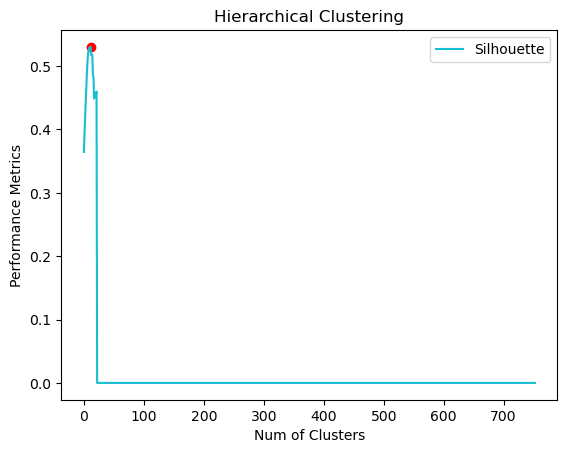

In [280]:
combined_mat, group_map, grouping_df = within_env_grouping(final_mat, rois, corr_thresh=0.8, stopping_thresh=10)

# potential non-singleton ROIs: 760
cluster:  7
Silhouette Score:  0.3644857165521154
cluster:  8
Silhouette Score:  0.39541776890939256
cluster:  9
Silhouette Score:  0.41811151329565077
cluster:  10
Silhouette Score:  0.4439421130786951
cluster:  11
Silhouette Score:  0.46825250004330254
cluster:  12
Silhouette Score:  0.4909333887238417
cluster:  13
Silhouette Score:  0.5088290943129951
cluster:  14
Silhouette Score:  0.52059415074376
cluster:  15
Silhouette Score:  0.5255520116082559
cluster:  16
Silhouette Score:  0.5293072033404376
cluster:  17
Silhouette Score:  0.5298281357770885
cluster:  18
Silhouette Score:  0.5302479370768892
cluster:  19
Silhouette Score:  0.5175690590716133
cluster:  20
Silhouette Score:  0.5181174284534137
cluster:  21
Silhouette Score:  0.5165527532658413
cluster:  22
Silhouette Score:  0.4848769703449736
cluster:  23
Silhouette Score:  0.48203819577544255
best K: 11, best Silhouette: 0.5302479370768892


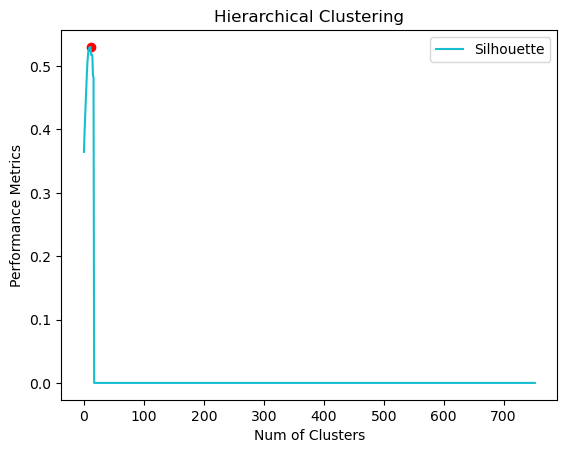

In [271]:
data, n_comp, group_ids= within_env_grouping(final_mat, rois, corr_thresh=0.8, stopping_thresh=5)

In [238]:
grouped_components = []
group_map = {}
pca = PCA(n_components=1)

gid = 0
idx = np.where(group_ids == gid)[0]
group_map[gid] = list(idx)
roi_group = data[idx].T

In [227]:
group0 = grouping_df.loc[grouping_df['group id']==0]['raw roi'].tolist()

In [195]:
ind_df = pd.DataFrame(grouping_rois, columns=['grouping ind'])
ind_df['cluster'] = grouping_id
ind_df['final rois'] = final_rois_ind[grouping_rois]
ind_df['selected rois'] = rois[final_rois]
ind_df

IndexError: index 1773 is out of bounds for axis 0 with size 1770

In [211]:
grouping_df

,raw roi,group id
0,9,4.0
1,12,17.0
2,15,7.0
3,16,4.0
4,20,16.0
...,...,...
755,9833,4.0
756,9860,8.0
757,9890,12.0
758,9893,15.0


In [206]:
grouping_df = pd.DataFrame(final_rois[grouping_rois], columns=['raw roi'])
grouping_df['group id'] = clusters_all[18]

In [210]:
grouping_df.sort_values(by='group id').to_csv('L34_first5000_hierarchical_grouping.csv')

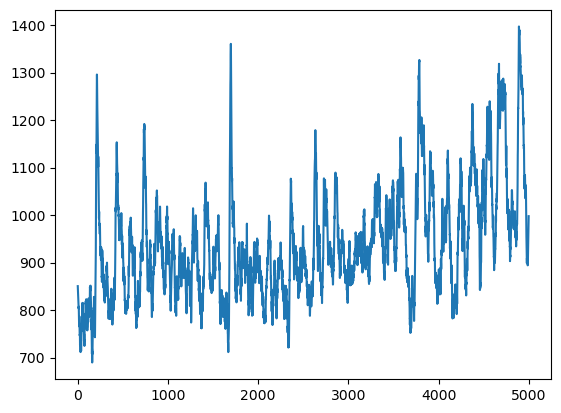

In [209]:
plt.plot(s[7908,:])

In [185]:
grouping_rois = np.where(max_corr>corr_thresh)[0]

In [186]:
grouping_id = clusters_all[18]

In [ ]:
# Chong's note: 7500 instead of 5000!!!
# Chong: corrected for the 0, so if no spike, correlation is 1!
fam_corr = np.corrcoef(fc3_filtered[max_corr>corr_thresh, 500:7500])#+2.22e-16)
nov_corr = np.corrcoef(fc3_filtered[max_corr>corr_thresh, 8000:])#+2.22e-16)
# ground truth
n_comp, group_ids = connected_components(csr_matrix((fam_corr>nov_corr_mean+2*nov_corr_std) & (nov_corr>nov_corr_mean+2*nov_corr_std)), directed=False, return_labels=True
    )